In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

In [2]:
df = pd.read_csv("prot_distribution.tsv",sep="\t")

In [19]:
filt_list = ["raw" ,"OP"  ]
eval_list = ["1e3" ,"1e6" ]
mask_list = ["norm","sens"]
inf_list  = ["1.1" ,"1.5" ]
species_list = list(set(df["species_name"].values.flatten().tolist()))
species_list.sort()

In [16]:
species_list = ["Babesia_bovis"]

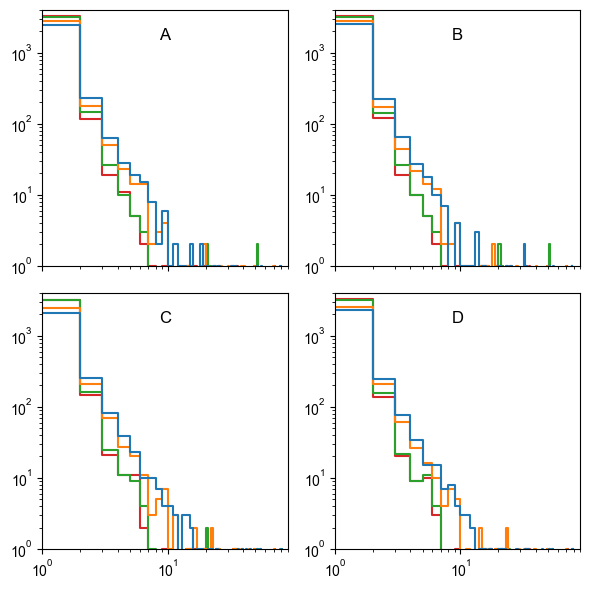

In [18]:
for species in species_list:
    fig, axes = plt.subplots(2,2,figsize=(6,6))
    counter_1 = 0
    counter_2 = 0
    counter_3 = 0
    title_list = ["A","B","C","D"]
    frequencies = []
    og_sizes    = []
    for filt in filt_list:
        for e_value in eval_list:
            for mask in mask_list:
                for inf in inf_list:
                    cur_dataset = filt + "_"  + e_value + "_"+ mask +"_" + inf
                    tmp_df = df.copy()
                    condition = (tmp_df["species_name"] == species) & (tmp_df["source"] == cur_dataset)
                    tmp_df = tmp_df[condition]
                    tmp_val_list = tmp_df["og_size"].values.flatten().tolist()
                    tmp_max_og_size = max(tmp_val_list)
                    tmp_mode = mode(tmp_val_list)
                    tmp_mode_list = [x for x in tmp_val_list if x == tmp_mode]
                    tmp_max_value = len(tmp_mode_list)
                    frequencies.append(tmp_max_value)
                    og_sizes.append(tmp_max_og_size)
                    del tmp_df
    max_freq    = (int(max(frequencies) / 1000) + 1 ) * 1000
    max_og_size = (int(max(og_sizes)    / 10)   + 1 ) * 10
    for mask in mask_list:
        for e_value in eval_list:
            dataset_list = []
            for inf in inf_list:
                for filt in filt_list:
                    dataset = filt + "_"  + e_value + "_" + mask + "_" + inf
                    dataset_list.append(dataset)
            cur_df = df.copy()
            cur_df = cur_df[(cur_df["species_name"]==species) & (cur_df["source"].isin(dataset_list)) ]
            sns.histplot(ax=axes[counter_1,counter_2],data=cur_df, x="og_size", hue="source",fill=False,binwidth=1,hue_order=dataset_list,element="step",legend=False)
            #sns.histplot(ax=axes[counter_1,counter_2],data=cur_df, x="og_size", hue="source",fill=False,binwidth=1,hue_order=dataset_list,element="step")
            axes[counter_1,counter_2].set_ylim(1,max_freq)
            axes[counter_1,counter_2].set_xlim(1,max_og_size)
            axes[counter_1,counter_2].set_yscale("log")
            axes[counter_1,counter_2].set_xscale("log")
            axes[counter_1,counter_2].set(xlabel=None)
            axes[counter_1,counter_2].set(ylabel=None)
            title_str = title_list[counter_3]
            axes[counter_1,counter_2].set_title(title_str,y=0.85)
            if(counter_1==0):
                axes[counter_1,counter_2].set(xticklabels=[])
            del cur_df
            counter_2 += 1
            counter_3 += 1
            if counter_2%2 == 0:
                counter_2 = 0
                counter_1 += 1
    file_name = species + ".svg"
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['font.family'] = 'Arial'
    plt.tight_layout()
    plt.savefig(file_name)
    plt.show()
    plt.close()